# 导包

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor

from xgboost import XGBRegressor

from lightgbm import LGBMRegressor
# 支持向量机
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

# 数据聚合

In [2]:
train = pd.read_csv('./zhengqi_train.txt',sep = '\t')
test = pd.read_csv('./zhengqi_test.txt',sep = '\t')

train['origin'] = 'train'
test['origin'] = 'test'

data_all = pd.concat([train,test])
print(data_all.shape)
data_all.head()

(4813, 40)


,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V30,V31,V32,V33,V34,V35,V36,V37,target,origin
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175,train
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676,train
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633,train
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206,train
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384,train


# 特征搜索

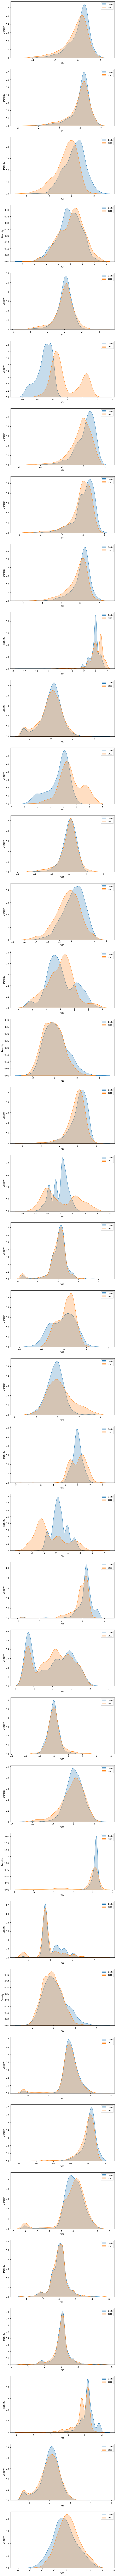

In [3]:
plt.figure(figsize=(9,38*6))
for i,col in enumerate(data_all.columns[:-2]):
    cond = data_all['origin'] == 'train'
    train_col = data_all[col][cond] #训练数据
    cond = data_all['origin'] == 'test'
    test_col = data_all[col][cond] #测试数据
    axes = plt.subplot(38,1,i+1)
    ax = sns.kdeplot(train_col,shade = True)
    sns.kdeplot(test_col,shade = True,ax = ax)
    plt.legend(['train','test'])
    plt.xlabel(col)

In [4]:
drop_labels = ['V5','V11','V17','V22']
data_all.drop(drop_labels,axis = 1,inplace=True)
data_all.shape

(4813, 36)

# 相关性系数

In [5]:
corr = data_all.corr()
corr.head()

,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
V0,1.000000,0.903956,0.340461,0.359282,0.784818,0.180407,0.151916,0.767851,0.053435,0.321410,...,0.329477,0.172895,0.508807,0.064368,0.034757,-0.026891,0.162464,0.254690,-0.498186,0.873212
V1,0.903956,1.000000,0.401569,0.359444,0.656967,0.262878,0.213067,0.856041,0.127948,0.333175,...,0.150988,0.184069,0.605012,0.095870,0.016320,-0.028008,0.167835,0.258545,-0.515528,0.871846
V2,0.340461,0.401569,1.000000,0.232290,-0.100508,0.725961,0.585948,0.676652,-0.027415,0.348486,...,-0.287455,0.172618,0.655904,0.117054,0.052605,0.045029,0.216448,0.322294,-0.676184,0.638878
V3,0.359282,0.359444,0.232290,1.000000,0.277331,0.171307,0.175978,0.352149,0.088080,0.354038,...,0.100186,0.049129,0.341599,-0.064779,-0.005905,-0.050442,0.029779,0.350869,-0.177359,0.512074
V4,0.784818,0.656967,-0.100508,0.277331,1.000000,-0.144960,-0.052792,0.384388,-0.023426,0.152344,...,0.624843,0.039329,0.278571,-0.053256,0.009040,-0.048525,0.037113,0.125256,-0.060455,0.603984


In [6]:
cond = corr.loc['target'].abs() < 0.1
drop_labels = corr.loc['target'].index[cond]
drop_labels

Index(['V14', 'V21', 'V25', 'V26', 'V32', 'V33', 'V34'], dtype='object')

In [7]:
drop_labels = ['V14', 'V21']
data_all.drop(drop_labels,axis = 1,inplace=True)
data_all.shape

(4813, 34)

# 标准化

In [8]:
pd.set_option('display.max_columns',None)

In [9]:
data_all[data_all['origin'] == 'test'].describe()

,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,V12,V13,V15,V16,V18,V19,V20,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,1925.000000,0.0
mean,-0.184404,-0.083912,-0.434762,0.101671,-0.019172,-0.274092,-0.173971,-0.266709,0.255114,-0.051709,-0.034592,-0.293726,-0.144125,-0.170339,-0.082423,0.172829,0.279249,-0.233952,0.032064,0.077170,-0.108471,-0.408566,-0.206871,-0.146463,-0.083215,-0.191729,-0.030782,-0.011433,-0.009985,-0.296895,-0.046270,0.195735,NaN
std,1.073333,1.076670,0.969541,1.034925,1.147286,1.054119,1.040101,1.085916,1.014394,1.043967,1.139994,1.039017,0.930072,1.001178,1.060944,0.778954,1.199153,0.986066,0.947513,1.110116,1.137409,1.453598,1.064140,0.880593,1.126414,1.138454,1.130228,0.989732,0.995213,0.946896,1.040854,0.940599,NaN
min,-4.814000,-5.488000,-4.283000,-3.276000,-4.921000,-5.649000,-5.625000,-6.059000,-6.784000,-2.583000,-5.505000,-4.087000,-2.376000,-6.060000,-3.583000,-1.904000,-2.861000,-5.552000,-1.339000,-4.732000,-4.891000,-6.874000,-2.435000,-2.413000,-4.507000,-7.698000,-4.057000,-4.627000,-4.789000,-7.477000,-2.608000,-3.346000,NaN
25%,-0.664000,-0.451000,-0.978000,-0.644000,-0.497000,-0.732000,-0.509000,-0.775000,-0.390000,-0.568000,-0.473000,-0.923000,-0.839000,-0.597000,-0.384000,-0.412000,-0.569000,-0.216000,-0.631000,-0.535000,-0.731000,-0.124000,-0.453000,-0.818000,-0.339000,-0.476000,-0.472000,-0.460000,-0.290000,-0.349000,-0.593000,-0.432000,NaN
50%,0.065000,0.195000,-0.267000,0.220000,0.118000,-0.082000,0.018000,-0.004000,0.401000,0.079000,0.132000,-0.204000,-0.198000,-0.005000,0.075000,0.291000,0.107000,-0.162000,0.093000,-0.026000,0.063000,0.179000,-0.445000,-0.199000,0.010000,0.100000,0.155000,-0.040000,0.160000,-0.270000,0.083000,0.152000,NaN
75%,0.549000,0.589000,0.278000,0.793000,0.610000,0.457000,0.515000,0.482000,0.904000,0.634000,0.583000,0.412000,0.493000,0.464000,0.438000,0.746000,0.966000,0.356000,0.800000,0.460000,0.682000,0.317000,-0.434000,0.468000,0.447000,0.471000,0.627000,0.419000,0.273000,0.364000,0.651000,0.797000,NaN
max,2.100000,2.120000,1.946000,2.603000,4.475000,1.528000,1.394000,2.408000,1.766000,3.118000,4.011000,2.587000,3.073000,2.033000,4.440000,2.196000,4.056000,1.354000,1.795000,6.616000,2.472000,0.786000,4.656000,3.022000,3.139000,1.428000,2.299000,5.465000,5.110000,1.671000,2.861000,3.021000,NaN


In [10]:
data_all[data_all['origin'] == 'train'].describe()

,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,V12,V13,V15,V16,V18,V19,V20,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,0.182892,0.116155,0.177856,-0.169452,0.034319,0.023177,0.195738,0.096146,0.113505,0.055034,-0.114884,-0.186226,0.155978,-0.021813,-0.051679,0.072092,0.272407,0.137712,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.918054,0.955116,0.895444,0.953813,0.968272,0.894092,0.922757,1.033048,0.983128,0.953466,1.108859,0.788511,0.978757,1.033403,0.915957,0.889771,0.270374,0.929899,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-4.576000,-5.048000,-4.692000,-12.891000,-2.584000,-5.165000,-3.675000,-2.903000,-5.981000,-3.582000,-3.704000,-3.402000,-5.542000,-1.344000,-3.808000,-5.131000,-1.164000,-2.435000,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.310000,-0.295000,-0.159000,-0.390000,-0.420500,-0.419000,-0.398000,-0.662250,-0.300000,-0.367500,-0.987500,-0.675500,0.097250,-1.191000,-0.557250,-0.452000,0.157750,-0.455000,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,0.388000,0.344000,0.362000,0.042000,0.157000,0.123000,0.289500,-0.000500,0.306000,0.082000,-0.000500,-0.156500,0.338000,0.095000,-0.076000,0.075000,0.325000,-0.447000,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,0.831250,0.782250,0.726000,0.042000,0.619250,0.616000,0.864250,0.730000,0.774250,0.513250,0.737250,0.304000,0.368250,0.931250,0.356000,0.644250,0.442000,0.730000,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,1.895000,1.918000,2.245000,1.335000,4.830000,2.657000,2.475000,4.314000,2.861000,4.441000,3.431000,3.525000,1.906000,2.423000,7.284000,2.980000,0.925000,4.671000,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


In [11]:
stand = StandardScaler()
data = data_all.iloc[:,:-2]
data2 = stand.fit_transform(data)
data2

array([[ 0.56597193,  0.01591954, -0.14297122, ..., -5.1011359 ,
        -2.60811143, -3.50838833],
       [ 0.96800866,  0.43695666,  0.06604898, ...,  0.36409451,
        -0.33491851, -0.7301463 ],
       [ 1.01301277,  0.56796822,  0.23506531, ...,  0.36409451,
         0.76517485, -0.58913402],
       ...,
       [-2.61531873, -3.56439613, -3.4022862 , ..., -1.53698564,
        -2.54410599,  1.61205774],
       [-2.66132294, -3.64640336, -3.27127354, ..., -1.53698564,
        -2.54910642,  1.43104197],
       [-2.32129187, -3.03734966, -3.21426803, ..., -1.53698564,
        -1.12298539,  1.9880905 ]])

In [12]:
cols = data_all.columns
data_all_std = pd.DataFrame(data2,columns=cols[:-2])
data_all_std

,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,V12,V13,V15,V16,V18,V19,V20,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.565972,0.015920,-0.142971,0.407057,0.451955,-1.812243,-2.360292,-0.436096,-2.114034,-0.939993,-0.073078,0.550083,-0.000048,-1.707156,-0.573113,-0.991209,0.610125,0.356014,0.800200,-0.222870,0.796179,0.167972,-0.449926,0.136001,0.109006,-0.615061,0.326836,-4.627276,-4.789544,-5.101136,-2.608111,-3.508388
1,0.968009,0.436957,0.066049,0.566074,0.193932,-1.566226,-2.360292,0.331988,-2.114034,0.188105,-0.134084,1.109140,-0.000048,-0.977080,-0.571113,-0.836206,0.588122,0.357014,0.801200,-0.143865,1.057196,0.337989,0.671155,-0.128028,0.124008,0.032007,0.599843,-0.843138,0.159981,0.364095,-0.334919,-0.730146
2,1.013013,0.567968,0.235065,0.370053,0.111925,-1.367212,-2.360292,0.395995,-2.114034,0.874165,-0.072078,0.767105,-0.212070,-0.618043,-0.564112,-0.558201,0.576121,0.355014,0.961187,-0.066860,0.915187,0.325988,1.287200,-0.009015,0.361034,0.277033,-0.116176,-0.843138,0.159981,0.364095,0.765175,-0.589134
3,0.732987,0.367951,0.283070,0.165031,0.598968,-1.200201,-2.086271,0.402996,-2.114034,0.011090,-0.014073,0.769105,-0.162065,-0.429023,-0.574113,-0.564201,0.272086,0.352014,1.435149,0.113152,0.898186,0.276983,1.298201,0.014988,0.417040,0.279033,0.602844,-0.843138,-0.065042,0.364095,0.333138,-0.112092
4,0.683983,0.637974,0.260068,0.209035,0.336945,-1.073192,-2.086271,0.313986,-2.114034,-0.250933,0.198947,-0.349009,-0.138063,-0.391019,-0.572113,-0.394197,0.106068,0.352014,0.881193,0.221159,0.386151,0.331989,1.289200,0.183006,1.078113,0.328038,0.417839,-0.843138,-0.215058,0.364095,-0.279914,-0.028085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4808,-1.362204,-1.553219,-3.096257,-0.444036,0.380949,-4.854453,-5.331512,-4.074495,-3.837771,-2.551133,0.395964,0.928122,0.867044,-5.143511,-3.573409,0.106813,-0.087954,-1.538177,-0.629685,-3.072059,-1.119949,-1.674221,0.525145,0.171004,-4.488502,-5.793606,-4.050283,-1.187151,-0.852126,-2.131011,-2.564108,0.596969
4809,-2.698326,-3.452386,-3.620307,-1.066103,-1.385208,-4.927458,-5.103495,-4.393530,-1.683100,-2.525131,-1.786233,1.871218,1.135072,-5.774577,-0.965152,0.192815,-0.506002,-1.479171,-0.203719,-3.432082,-2.101015,-1.773231,-0.445926,1.297125,-0.613074,-7.698806,-0.674191,-1.187151,-0.852126,-2.131011,-2.564108,1.215023
4810,-2.615319,-3.564396,-3.402286,-0.422033,-1.272198,-4.223410,-4.315437,-5.196618,-3.406837,-2.529131,-1.151175,1.976228,0.504005,-4.752471,-1.568211,0.300817,0.109068,-1.085132,1.057179,-2.409015,0.477157,-1.585212,-0.446926,0.552045,0.125008,-6.111639,0.274835,-1.851175,-1.548200,-1.536986,-2.544106,1.612058
4811,-2.661323,-3.646403,-3.271274,-0.699063,-1.270198,-3.716375,-3.809399,-4.735567,-2.975902,-2.560134,-1.512208,1.520182,0.205974,-4.200414,-1.282183,-0.036190,-1.015059,-1.084132,0.800200,-2.339010,0.050129,-1.410193,-0.446926,0.318020,1.086114,-5.268550,0.682846,-1.645168,-1.471192,-1.536986,-2.549106,1.431042


In [13]:
data_all.index = np.arange(4813)
data_all

,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,V12,V13,V15,V16,V18,V19,V20,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,target,origin
0,0.566,0.016,-0.143,0.407,0.452,-1.812,-2.360,-0.436,-2.114,-0.940,-0.073,0.550,0.000,-1.707,-0.573,-0.991,0.610,0.356,0.800,-0.223,0.796,0.168,-0.450,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175,train
1,0.968,0.437,0.066,0.566,0.194,-1.566,-2.360,0.332,-2.114,0.188,-0.134,1.109,0.000,-0.977,-0.571,-0.836,0.588,0.357,0.801,-0.144,1.057,0.338,0.671,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676,train
2,1.013,0.568,0.235,0.370,0.112,-1.367,-2.360,0.396,-2.114,0.874,-0.072,0.767,-0.212,-0.618,-0.564,-0.558,0.576,0.355,0.961,-0.067,0.915,0.326,1.287,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633,train
3,0.733,0.368,0.283,0.165,0.599,-1.200,-2.086,0.403,-2.114,0.011,-0.014,0.769,-0.162,-0.429,-0.574,-0.564,0.272,0.352,1.435,0.113,0.898,0.277,1.298,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206,train
4,0.684,0.638,0.260,0.209,0.337,-1.073,-2.086,0.314,-2.114,-0.251,0.199,-0.349,-0.138,-0.391,-0.572,-0.394,0.106,0.352,0.881,0.221,0.386,0.332,1.289,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4808,-1.362,-1.553,-3.096,-0.444,0.381,-4.854,-5.331,-4.074,-3.838,-2.551,0.396,0.928,0.867,-5.143,-3.573,0.107,-0.088,-1.538,-0.630,-3.072,-1.120,-1.674,0.525,0.171,-4.488,-5.793,-4.050,-1.187,-0.852,-2.131,-2.564,0.597,NaN,test
4809,-2.698,-3.452,-3.620,-1.066,-1.385,-4.927,-5.103,-4.393,-1.683,-2.525,-1.786,1.871,1.135,-5.774,-0.965,0.193,-0.506,-1.479,-0.204,-3.432,-2.101,-1.773,-0.446,1.297,-0.613,-7.698,-0.674,-1.187,-0.852,-2.131,-2.564,1.215,NaN,test
4810,-2.615,-3.564,-3.402,-0.422,-1.272,-4.223,-4.315,-5.196,-3.407,-2.529,-1.151,1.976,0.504,-4.752,-1.568,0.301,0.109,-1.085,1.057,-2.409,0.477,-1.585,-0.447,0.552,0.125,-6.111,0.275,-1.851,-1.548,-1.537,-2.544,1.612,NaN,test
4811,-2.661,-3.646,-3.271,-0.699,-1.270,-3.716,-3.809,-4.735,-2.976,-2.560,-1.512,1.520,0.206,-4.200,-1.282,-0.036,-1.015,-1.084,0.800,-2.339,0.050,-1.410,-0.447,0.318,1.086,-5.268,0.683,-1.645,-1.471,-1.537,-2.549,1.431,NaN,test


In [14]:
data_all_std = pd.merge(data_all_std,data_all.iloc[:,-2:],right_index=True,left_index=True)
data_all_std.head()

,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,V12,V13,V15,V16,V18,V19,V20,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,target,origin
0,0.565972,0.015920,-0.142971,0.407057,0.451955,-1.812243,-2.360292,-0.436096,-2.114034,-0.939993,-0.073078,0.550083,-0.000048,-1.707156,-0.573113,-0.991209,0.610125,0.356014,0.800200,-0.222870,0.796179,0.167972,-0.449926,0.136001,0.109006,-0.615061,0.326836,-4.627276,-4.789544,-5.101136,-2.608111,-3.508388,0.175,train
1,0.968009,0.436957,0.066049,0.566074,0.193932,-1.566226,-2.360292,0.331988,-2.114034,0.188105,-0.134084,1.109140,-0.000048,-0.977080,-0.571113,-0.836206,0.588122,0.357014,0.801200,-0.143865,1.057196,0.337989,0.671155,-0.128028,0.124008,0.032007,0.599843,-0.843138,0.159981,0.364095,-0.334919,-0.730146,0.676,train
2,1.013013,0.567968,0.235065,0.370053,0.111925,-1.367212,-2.360292,0.395995,-2.114034,0.874165,-0.072078,0.767105,-0.212070,-0.618043,-0.564112,-0.558201,0.576121,0.355014,0.961187,-0.066860,0.915187,0.325988,1.287200,-0.009015,0.361034,0.277033,-0.116176,-0.843138,0.159981,0.364095,0.765175,-0.589134,0.633,train
3,0.732987,0.367951,0.283070,0.165031,0.598968,-1.200201,-2.086271,0.402996,-2.114034,0.011090,-0.014073,0.769105,-0.162065,-0.429023,-0.574113,-0.564201,0.272086,0.352014,1.435149,0.113152,0.898186,0.276983,1.298201,0.014988,0.417040,0.279033,0.602844,-0.843138,-0.065042,0.364095,0.333138,-0.112092,0.206,train
4,0.683983,0.637974,0.260068,0.209035,0.336945,-1.073192,-2.086271,0.313986,-2.114034,-0.250933,0.198947,-0.349009,-0.138063,-0.391019,-0.572113,-0.394197,0.106068,0.352014,0.881193,0.221159,0.386151,0.331989,1.289200,0.183006,1.078113,0.328038,0.417839,-0.843138,-0.215058,0.364095,-0.279914,-0.028085,0.384,train


In [15]:
data_all_std.describe()

,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,V12,V13,V15,V16,V18,V19,V20,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,4.813000e+03,2888.000000
mean,2.749607e-16,1.145977e-16,3.744263e-16,-1.575027e-16,-3.333206e-17,-1.949637e-16,-2.962748e-16,-6.311178e-17,4.427052e-15,-6.702311e-17,2.287341e-16,-2.123333e-16,-9.579797e-17,-9.503675e-18,-5.723888e-16,1.110454e-16,3.465612e-16,2.904157e-16,-5.633926e-16,-1.033409e-17,1.436739e-16,2.661952e-16,1.343559e-15,-5.746148e-16,-5.884436e-17,-1.948715e-16,-1.706971e-17,1.260390e-16,-3.322596e-16,-1.032145e-14,1.657607e-16,-1.793703e-16,0.126353
std,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,1.000104e+00,0.983966
min,-4.814520e+00,-5.488566e+00,-4.283371e+00,-3.956418e+00,-4.921523e+00,-5.649508e+00,-5.625534e+00,-6.059712e+00,-1.288939e+01,-2.584136e+00,-5.505569e+00,-4.087390e+00,-2.903355e+00,-6.060606e+00,-3.583410e+00,-3.704265e+00,-3.402329e+00,-5.552583e+00,-1.343627e+00,-4.732168e+00,-5.131218e+00,-6.874765e+00,-2.435070e+00,-2.912326e+00,-4.507504e+00,-7.698806e+00,-4.057283e+00,-4.627276e+00,-4.789544e+00,-7.477236e+00,-2.608111e+00,-3.630399e+00,-3.044000
25%,-4.681226e-01,-3.191100e-01,-6.250178e-01,-6.510581e-01,-4.281231e-01,-4.941518e-01,-3.681437e-01,-4.290956e-01,-3.902971e-01,-4.759526e-01,-4.341107e-01,-6.170359e-01,-7.451267e-01,-4.450251e-01,-3.790941e-01,-7.472045e-01,-6.390166e-01,-1.870409e-01,-1.190640e+00,-5.518919e-01,-5.359103e-01,5.595993e-02,-4.539264e-01,-7.210913e-01,-3.010393e-01,-3.000276e-01,-4.281845e-01,-4.991259e-01,-2.900663e-01,-3.489356e-01,-4.849312e-01,-6.661407e-01,-0.350250
50%,2.449426e-01,2.369390e-01,1.050527e-01,7.302061e-02,1.139252e-01,1.908956e-01,1.978983e-01,2.309767e-01,4.163690e-02,1.331003e-01,1.249398e-01,1.030375e-01,-7.805624e-02,1.870403e-01,7.795097e-02,1.508138e-01,-6.595178e-02,3.310114e-01,9.425669e-02,-5.985935e-02,7.013018e-02,2.699823e-01,-4.459258e-01,-9.702433e-02,3.799817e-02,2.170268e-01,9.182964e-02,-4.010929e-02,1.599815e-01,3.640945e-01,1.151197e-01,-4.308645e-02,0.313000
75%,6.659811e-01,5.949706e-01,6.981101e-01,7.040892e-01,5.759663e-01,7.049312e-01,6.839344e-01,6.370211e-01,9.035053e-01,6.261431e-01,6.039831e-01,7.181002e-01,6.330189e-01,6.600893e-01,4.429870e-01,7.418258e-01,4.961118e-01,3.600143e-01,8.211981e-01,4.061715e-01,6.571694e-01,3.989958e-01,5.001429e-01,6.230529e-01,4.690458e-01,5.780648e-01,5.868431e-01,4.189074e-01,2.729934e-01,3.640945e-01,6.471648e-01,6.469737e-01,0.793250
max,2.121114e+00,2.120105e+00,2.828316e+00,2.603296e+00,4.475314e+00,1.895013e+00,1.918026e+00,2.408215e+00,1.765374e+00,4.830508e+00,4.011291e+00,2.587291e+00,4.314408e+00,2.861317e+00,4.441381e+00,3.430881e+00,4.056514e+00,1.906171e+00,2.423069e+00,7.284627e+00,2.980325e+00,9.250508e-01,4.671446e+00,4.580477e+00,3.139341e+00,2.013216e+00,2.394892e+00,5.465091e+00,5.110507e+00,2.324177e+00,5.238554e+00,3.021181e+00,2.538000


# 岭回归

In [16]:
from sklearn.linear_model import RidgeCV

In [17]:
ridge = RidgeCV(alphas=[0.0001,0.001,0.01,0.1,0.2,0.5,1,2,3,4,5,10,20,30,50])

cond = data_all_std['origin'] == 'train'
X_train = data_all_std[cond].iloc[:,:-2]
y_train = data_all_std[cond]['target']
ridge.fit(X_train,y_train)

y_ = ridge.predict(X_train)

In [18]:
cond = abs((y_train - y_ )) > y_train.std()*0.8
cond.sum()

88

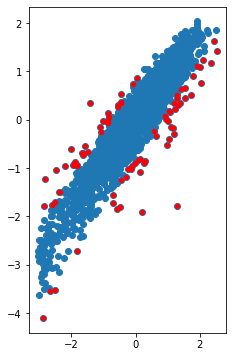

In [19]:
plt.figure(figsize=(12,6))
axes = plt.subplot(1,3,1)
axes.scatter(y_train,y_)
axes.scatter(y_train[cond],y_[cond],c = 'red',s = 20)

In [20]:
drop_index = cond[cond].index
data_all_std.drop(drop_index,axis = 0,inplace=True)
data_all_std.shape

(4725, 34)

In [21]:
def detect_model(etsimators,data):
    for key,estimator in estimators.items():
        estimator.fit(data[0],data[2])
        y_ = estimator.predict(data[1])
        mse = mean_squared_error(data[3],y_)
        print('-------------------mse%s'%(key),mse)
        r2 = estimator.score(data[1],data[3])
        print('+++++++++++++++++++r2_score%s'%(key),r2)
        print('\n')

In [22]:
cond = data_all_std['origin'] == 'train'
X = data_all_std[cond].iloc[:,:-2]
y = data_all_std[cond]['target']
data = train_test_split(X,y,test_size = 0.2)

In [23]:
estimators = {}
estimators['knn'] = KNeighborsRegressor()
estimators['linear'] = LinearRegression()
estimators['ridge'] = Ridge()
estimators['lasso'] = Lasso()
estimators['elasticnet'] = ElasticNet()
estimators['forest'] = RandomForestRegressor()
estimators['gbdt'] = GradientBoostingRegressor()
estimators['ada'] = AdaBoostRegressor()
estimators['extreme'] = ExtraTreesRegressor()
estimators['svm_rbf'] = SVR(kernel='rbf')
estimators['svm_poly'] = SVR(kernel='poly')
estimators['light'] = LGBMRegressor()
estimators['xgb'] = XGBRegressor()

In [24]:
detect_model(estimators,data)

-------------------mseknn 0.15578981664285715
+++++++++++++++++++r2_scoreknn 0.8327857487040438


-------------------mselinear 0.08000418683514002
+++++++++++++++++++r2_scorelinear 0.9141289174705945


-------------------mseridge 0.079710951647321
+++++++++++++++++++r2_scoreridge 0.914443656286272


-------------------mselasso 0.9316797189612563
+++++++++++++++++++r2_scorelasso -1.9899302978743094e-06


-------------------mseelasticnet 0.5505403909947043
+++++++++++++++++++r2_scoreelasticnet 0.409087183795827


-------------------mseforest 0.08812979769732142
+++++++++++++++++++r2_scoreforest 0.9054074364012845


-------------------msegbdt 0.08545419040411832
+++++++++++++++++++r2_scoregbdt 0.9082792522871752


-------------------mseada 0.09766823251151466
+++++++++++++++++++r2_scoreada 0.895169525667703


-------------------mseextreme 0.08218633368892855
+++++++++++++++++++r2_scoreextreme 0.911786748641867


-------------------msesvm_rbf 0.09308361885972527
+++++++++++++++++++r2_score

In [25]:
estimators = {}
estimators['forest'] = RandomForestRegressor()
estimators['gbdt'] = GradientBoostingRegressor()
estimators['ada'] = AdaBoostRegressor()
estimators['extreme'] = ExtraTreesRegressor()
estimators['svm_rbf'] = SVR(kernel='rbf')
estimators['light'] = LGBMRegressor()
estimators['xgb'] = XGBRegressor()

In [26]:
cond = data_all_std['origin'] == 'train'

X_train = data_all_std[cond].iloc[:,:-2]
y_train = data_all_std[cond]['target']

cond = data_all_std['origin'] == 'test'
X_test = data_all_std[cond].iloc[:,:-2]

In [27]:
# 一个算法预测结果，将结果合并
y_pred = []
for key,model in estimators.items():
    model.fit(X_train,y_train)
    y_ = model.predict(X_test)
    y_pred.append(y_)

y_ = np.mean(y_pred,axis = 0)

In [28]:
pd.Series(y_).to_csv('./ensemble.txt',index =False)

# 归一化

In [29]:
data_all.head()

,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,V12,V13,V15,V16,V18,V19,V20,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,target,origin
0,0.566,0.016,-0.143,0.407,0.452,-1.812,-2.360,-0.436,-2.114,-0.940,-0.073,0.550,0.000,-1.707,-0.573,-0.991,0.610,0.356,0.800,-0.223,0.796,0.168,-0.450,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175,train
1,0.968,0.437,0.066,0.566,0.194,-1.566,-2.360,0.332,-2.114,0.188,-0.134,1.109,0.000,-0.977,-0.571,-0.836,0.588,0.357,0.801,-0.144,1.057,0.338,0.671,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676,train
2,1.013,0.568,0.235,0.370,0.112,-1.367,-2.360,0.396,-2.114,0.874,-0.072,0.767,-0.212,-0.618,-0.564,-0.558,0.576,0.355,0.961,-0.067,0.915,0.326,1.287,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633,train
3,0.733,0.368,0.283,0.165,0.599,-1.200,-2.086,0.403,-2.114,0.011,-0.014,0.769,-0.162,-0.429,-0.574,-0.564,0.272,0.352,1.435,0.113,0.898,0.277,1.298,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206,train
4,0.684,0.638,0.260,0.209,0.337,-1.073,-2.086,0.314,-2.114,-0.251,0.199,-0.349,-0.138,-0.391,-0.572,-0.394,0.106,0.352,0.881,0.221,0.386,0.332,1.289,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384,train


In [30]:
data = data_all.iloc[:,:-2]

minmaxscaler = MinMaxScaler()

data3 = minmaxscaler.fit_transform(data)
data3

array([[0.77577505, 0.723449  , 0.5821966 , ..., 0.24242424, 0.        ,
        0.01834311],
       [0.83374189, 0.77878549, 0.61158768, ..., 0.80002041, 0.28970176,
        0.43602466],
       [0.84023071, 0.79600421, 0.63535368, ..., 0.80002041, 0.42990059,
        0.45722448],
       ...,
       [0.31708724, 0.25289169, 0.12389256, ..., 0.60606061, 0.00815702,
        0.78815216],
       [0.31045422, 0.24211356, 0.14231472, ..., 0.60606061, 0.00751976,
        0.7609382 ],
       [0.35948089, 0.32216088, 0.15033047, ..., 0.60606061, 0.18926842,
        0.84468501]])

In [31]:
# 归一化的数据
data_all_norm = pd.DataFrame(data3,columns=data_all.columns[:-2])
data_all_norm

,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,V12,V13,V15,V16,V18,V19,V20,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37
0,0.775775,0.723449,0.582197,0.665193,0.571839,0.508616,0.432852,0.664108,0.735280,0.221743,0.570828,0.694786,0.402245,0.487950,0.375125,0.380238,0.537946,0.792169,0.569153,0.375250,0.730736,0.902936,0.279341,0.406834,0.603714,0.729379,0.679479,0.000000,0.000000,0.242424,0.000000,0.018343
1,0.833742,0.778785,0.611588,0.689434,0.544381,0.541225,0.432852,0.754813,0.735280,0.373887,0.564418,0.778544,0.402245,0.569779,0.375374,0.401962,0.534996,0.792304,0.569419,0.381824,0.762915,0.924734,0.437095,0.371596,0.605676,0.796005,0.721792,0.374950,0.499949,0.800020,0.289702,0.436025
2,0.840231,0.796004,0.635354,0.659552,0.535653,0.567603,0.432852,0.762372,0.735280,0.466415,0.570933,0.727300,0.372870,0.610021,0.376246,0.440925,0.533387,0.792035,0.611893,0.388232,0.745407,0.923195,0.523783,0.387480,0.636673,0.821234,0.610818,0.374950,0.499949,0.800020,0.429901,0.457224
3,0.799856,0.769716,0.642104,0.628297,0.587484,0.589740,0.469177,0.763198,0.735280,0.350013,0.577028,0.727600,0.379798,0.631207,0.375000,0.440084,0.492625,0.791633,0.737722,0.403212,0.743312,0.916912,0.525331,0.390683,0.643997,0.821440,0.722257,0.374950,0.477220,0.800020,0.374841,0.528943
4,0.792790,0.805205,0.638869,0.635005,0.559600,0.606575,0.469177,0.752687,0.735280,0.314675,0.599412,0.560084,0.383123,0.635467,0.375249,0.463910,0.470367,0.791633,0.590656,0.412200,0.680187,0.923965,0.524064,0.413107,0.730447,0.826485,0.693583,0.374950,0.462067,0.800020,0.296712,0.541573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4808,0.497765,0.517219,0.166924,0.535447,0.564283,0.105382,0.038977,0.234440,0.617657,0.004451,0.620113,0.751423,0.522378,0.102791,0.001246,0.534128,0.444355,0.538214,0.189541,0.138149,0.494514,0.666752,0.416549,0.411506,0.002485,0.196169,0.001085,0.340864,0.397717,0.545455,0.005608,0.635544
4809,0.305119,0.267613,0.093236,0.440616,0.376330,0.095705,0.069203,0.196764,0.764686,0.007958,0.390815,0.892718,0.559512,0.032059,0.326271,0.546181,0.388308,0.546125,0.302628,0.108189,0.373567,0.654058,0.279904,0.561799,0.509286,0.000000,0.524334,0.340864,0.397717,0.545455,0.005608,0.728462
4810,0.317087,0.252892,0.123893,0.538802,0.388357,0.189024,0.173671,0.101925,0.647063,0.007418,0.457545,0.908451,0.472080,0.146620,0.251122,0.561317,0.470770,0.598954,0.637377,0.193326,0.691407,0.678164,0.279764,0.462360,0.605807,0.163423,0.671420,0.275069,0.327407,0.606061,0.008157,0.788152
4811,0.310454,0.242114,0.142315,0.496570,0.388570,0.256230,0.240753,0.156372,0.676469,0.003237,0.419609,0.840126,0.430788,0.208497,0.286765,0.514085,0.320059,0.599088,0.569153,0.199151,0.638762,0.700603,0.279764,0.431127,0.731494,0.250232,0.734656,0.295482,0.335185,0.606061,0.007520,0.760938


In [32]:
data_all_norm = pd.merge(data_all_norm,data_all.iloc[:,-2:],left_index= True,right_index=True)

In [33]:
data_all_norm.describe()

,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,V12,V13,V15,V16,V18,V19,V20,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,4813.000000,2888.000000
mean,0.694172,0.721357,0.602300,0.603139,0.523743,0.748823,0.745740,0.715607,0.879536,0.348518,0.578507,0.612372,0.402251,0.679294,0.446542,0.519158,0.456147,0.744438,0.356712,0.393796,0.632582,0.881401,0.342653,0.388683,0.589459,0.792709,0.628824,0.458493,0.483790,0.762873,0.332385,0.545795,0.126353
std,0.144198,0.131443,0.140628,0.152462,0.106430,0.132560,0.132577,0.118105,0.068244,0.134882,0.105088,0.149835,0.138561,0.112095,0.124627,0.140166,0.134083,0.134085,0.265512,0.083226,0.123294,0.128221,0.140731,0.133475,0.130786,0.102976,0.155003,0.099095,0.101020,0.102037,0.127456,0.150356,0.983966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.044000
25%,0.626676,0.679416,0.514414,0.503888,0.478182,0.683324,0.696938,0.664934,0.852903,0.284327,0.532892,0.519928,0.299016,0.629414,0.399302,0.414436,0.370475,0.719362,0.040616,0.347870,0.566515,0.888575,0.278778,0.292445,0.550092,0.761816,0.562461,0.409037,0.454490,0.727273,0.270584,0.445647,-0.350250
50%,0.729488,0.752497,0.617072,0.614270,0.535866,0.774125,0.771974,0.742884,0.882377,0.366469,0.591635,0.627809,0.391437,0.700258,0.456256,0.540294,0.447305,0.788817,0.381736,0.388815,0.641228,0.916015,0.279904,0.375734,0.594428,0.815055,0.643056,0.454518,0.499949,0.800020,0.347056,0.539317,0.313000
75%,0.790195,0.799553,0.700464,0.710474,0.585036,0.842259,0.836405,0.790835,0.941189,0.432965,0.641971,0.719958,0.489954,0.753279,0.501745,0.623125,0.522660,0.792706,0.574728,0.427597,0.713599,0.932555,0.413031,0.471837,0.650798,0.852229,0.719777,0.500000,0.511365,0.800020,0.414861,0.643061,0.793250
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.538000


In [35]:
def scale_minmax(data):
    return (data - data.min())/(data.max() - data.min())

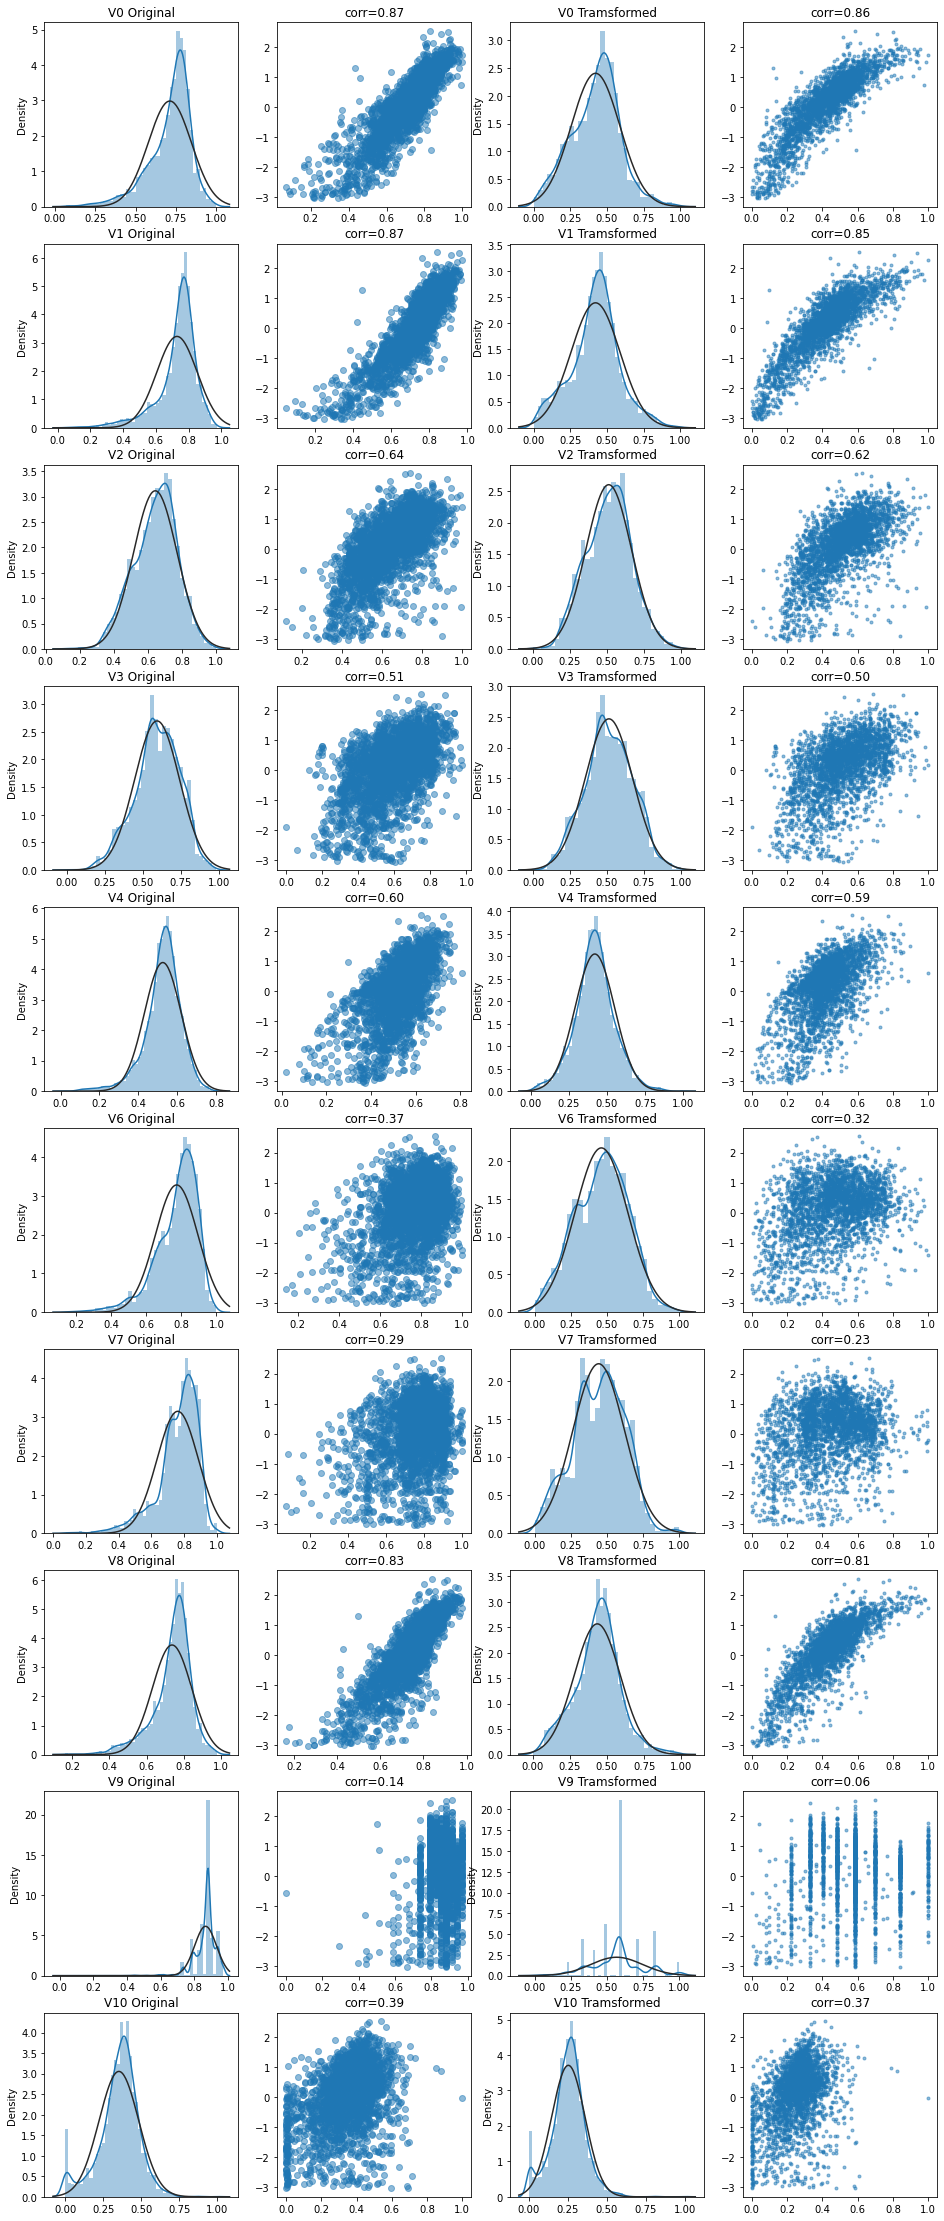

In [36]:
from scipy import stats
fcols = 4
frows = len(data_all_norm.columns[:10])
plt.figure(figsize=(4*fcols,4*frows))
i=0

for col in data_all_norm.columns[:10]:
    dat = data_all_norm[[col, 'target']].dropna()

#     数据分布图distribution（分布）
    i+=1
    plt.subplot(frows,fcols,i)
    sns.distplot(dat[col],fit = stats.norm);
    plt.title(col+' Original')
    plt.xlabel('')

#     散点图
    i+=1
    plt.subplot(frows,fcols,i)
    plt.scatter(dat[col],dat['target'],alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(dat[col], dat['target'])[0][1]))

#     ！！！对数据进行了处理！！！
#   数据分布图distribution
    i+=1
    plt.subplot(frows,fcols,i)
    trans_var, lambda_var = stats.boxcox(dat[col].dropna()+1)
    trans_var = scale_minmax(trans_var)      
    sns.distplot(trans_var , fit=stats.norm);
    plt.title(col+' Tramsformed')
    plt.xlabel('')

#     散点图
    i+=1
    plt.subplot(frows,fcols,i)
    plt.plot(trans_var, dat['target'],'.',alpha=0.5)
    plt.title('corr='+'{:.2f}'.format(np.corrcoef(trans_var,dat['target'])[0][1]))

In [37]:
for col in data_all_norm.columns[:-2]:
    boxcox,maxlog = stats.boxcox(data_all_norm[col] + 1)
    data_all_norm[col] = scale_minmax(boxcox)

# 过滤异常值

40


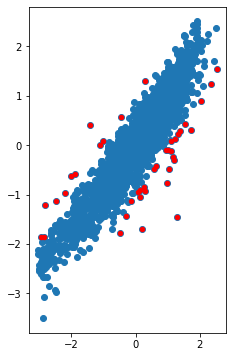

In [38]:
ridge = RidgeCV(alphas=[0.0001,0.001,0.01,0.1,0.2,0.5,1,2,3,4,5,10,20,30,50])

cond = data_all_norm['origin'] == 'train'

X_train = data_all_norm[cond].iloc[:,:-2]
# 真实值
y_train = data_all_norm[cond]['target']

ridge.fit(X_train,y_train)
# 预测值
y_ = ridge.predict(X_train)

cond = abs(y_ - y_train) > y_train.std()
print(cond.sum())
# 画图
plt.figure(figsize=(12,6))
axes = plt.subplot(1,3,1)
axes.scatter(y_train,y_)
axes.scatter(y_train[cond],y_[cond],c = 'red',s = 20)



In [39]:
index = cond[cond].index

data_all_norm.drop(index,axis = 0,inplace=True)

In [40]:
cond = data_all_norm['origin'] == 'train'
X_train = data_all_norm[cond].iloc[:,:-2]
y_train = data_all_norm[cond]['target']

cond = data_all_norm['origin'] == 'test'
X_test = data_all_norm[cond].iloc[:,:-2]

In [41]:
estimators = {}
estimators['forest'] = RandomForestRegressor(n_estimators=300)
estimators['gbdt'] = GradientBoostingRegressor(n_estimators=300)
estimators['ada'] = AdaBoostRegressor(n_estimators=300)
estimators['extreme'] = ExtraTreesRegressor(n_estimators=300)
estimators['svm_rbf'] = SVR(kernel='rbf')
estimators['light'] = LGBMRegressor(n_estimators=300)
estimators['xgb'] = XGBRegressor(n_estimators=300)

In [42]:
result = []
for key,model in estimators.items():
    model.fit(X_train,y_train)
    y_ = model.predict(X_test)
    result.append(y_)
y_ = np.mean(result,axis = 0)

pd.Series(y_).to_csv('./norm.txt',index = False)